<a href="https://colab.research.google.com/github/ReneeDu320/deep_learning/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

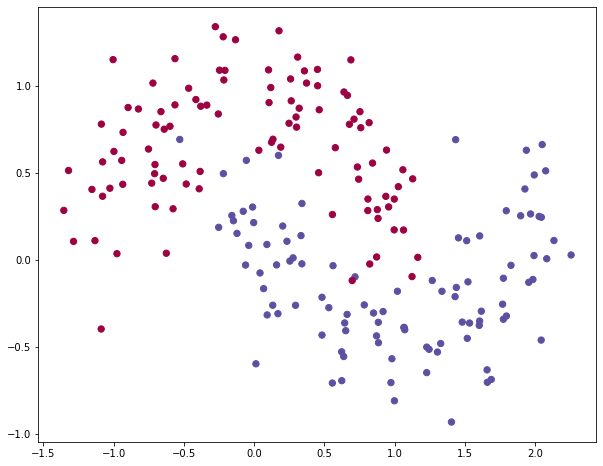

In [ ]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

try logistic regression

In [ ]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [ ]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

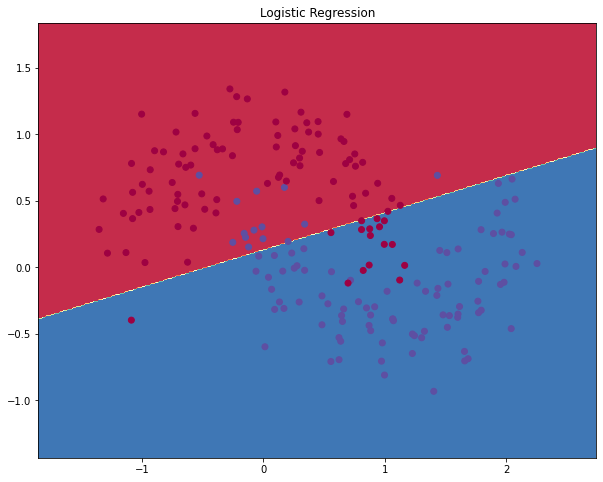

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

neural network

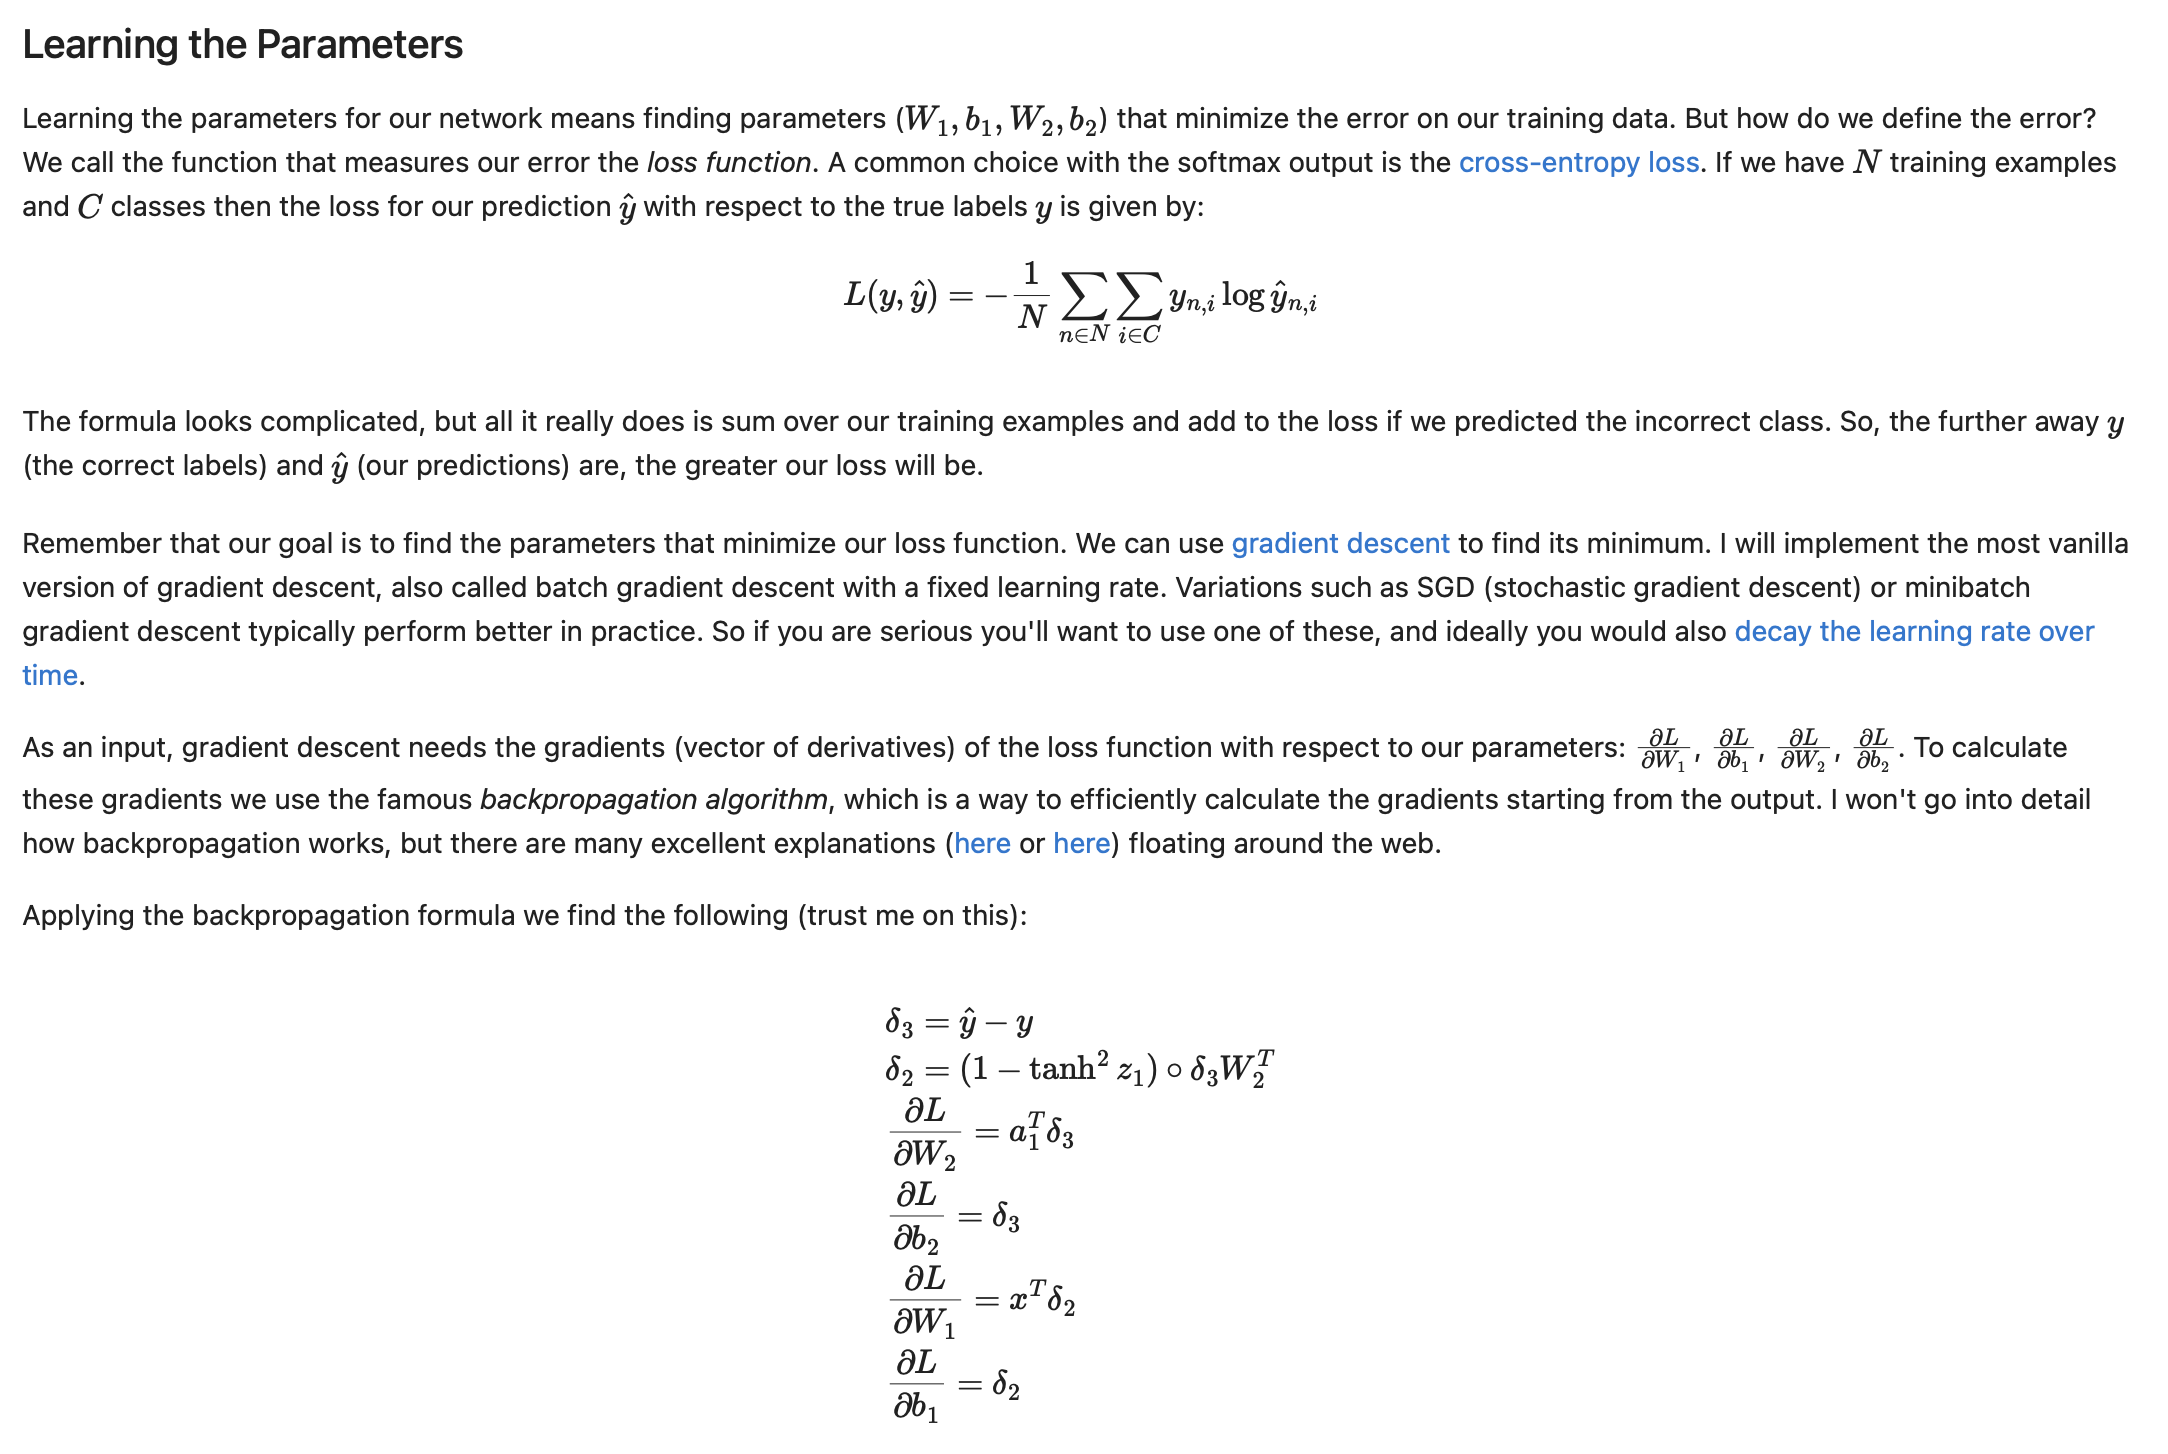

In [ ]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [ ]:
range(num_examples)

range(0, 200)

In [ ]:
 # Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [ ]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [ ]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

nn with 3 layers

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068925
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

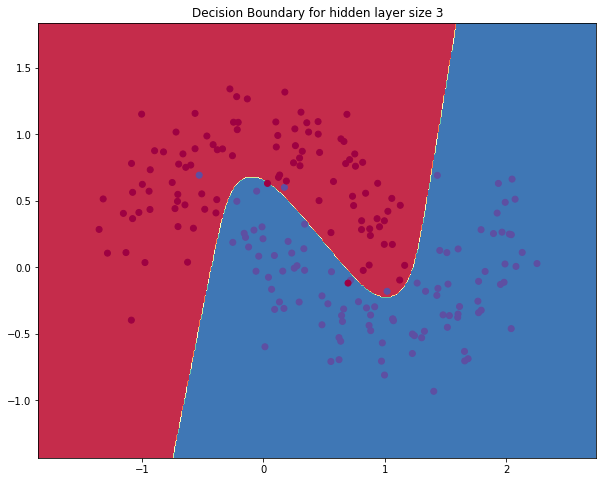

In [ ]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

varying hidden layer size

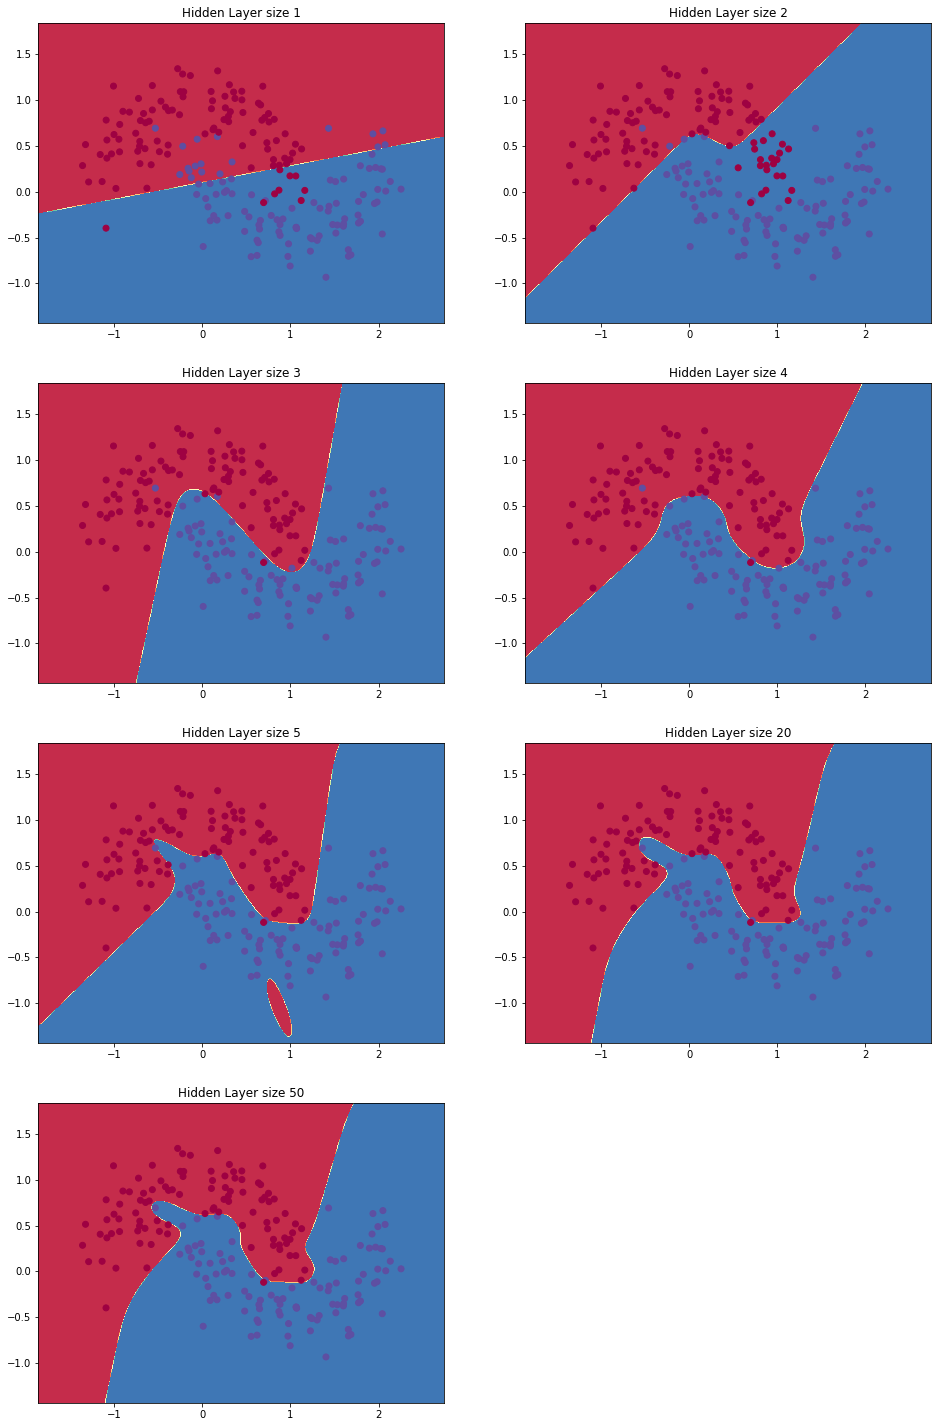

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

# cnn

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
import numpy as np

# PART 1：加载数据，设置超参

#超参设置
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

#pytorch 将会下载MNIST数据保存到DATA_PATH
#也会将训练好的模型保存到MODEL_STORE_PATH
DATA_PATH = "E:/DL/CNN/dataset"
MODEL_STORE_PATH = "E:/DL/CNN/model"

# transforms to apply to the data
# transforms.Compose函数来自于torchvision包
# 用Compose可以将各种transforms有序组合到一个list中
# 首先指定一个转换transforms.ToTensor()，将数据转换为pytorch tensor
# pytorch tensor是pytorch中特殊的数据类型，用于网络中数据和权重的操作，本质上是多维矩阵
# 接下来用transforms.Normalize对数据进行归一化，参数为数据的平均数和标准差
# MNIST数据是单通道的，多通道就需要提供每个通道的均值和方差
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset，这里创建了train_dataset和test_dataset对象
# root：train.pt和test.pt数据文件位置；train：指定获取train.pt或者test.pt数据
# tranform：对创建的数据进行操作transform操作；download：从线上下载MNIST数据
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

# pytorch中的DataLoader对象，可以对数据洗牌，批处理数据，多处理来并行加载数据
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting E:/DL/CNN/dataset/MNIST/raw/train-images-idx3-ubyte.gz to E:/DL/CNN/dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting E:/DL/CNN/dataset/MNIST/raw/train-labels-idx1-ubyte.gz to E:/DL/CNN/dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting E:/DL/CNN/dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to E:/DL/CNN/dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting E:/DL/CNN/dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to E:/DL/CNN/dataset/MNIST/raw



In [ ]:
# PART 2：创建CNN类

# 神经网络的结构：
# 输入图片为 28*28 单通道
# 第一次卷积：32 channels of 5 x 5 convolutional filters，a ReLU activation
# followed by 2 x 2 max pooling(stride = 2，this gives a 14 x 14 output)
# 第二次卷积：64 channels of 5 x 5 convolutional filters
# 2 x 2 max pooling (stride = 2，produce a 7 x 7 output) 
# 展开需要节点：7 x 7 x 64 = 3164 个，接上全连接层（含1000个节点）
# 最后对10个输出节点进行softmax操作，产生分类概率

class ConvNet(nn.Module):
    # 初始化定义网络的结构：也就是定义网络的层
    def __init__(self):
        super(ConvNet,self).__init__()

        # Sequential方法使我们有序的创建网络层
        # Conv2d nn.Module的方法，该方法创建一组卷积滤波器，
        # 第一个参数为输入的channel数，第二个参数为输出的channel数
        # kernel_size：卷积滤波器的尺寸，这里卷积滤波器为5*5，所以参数设置为5
        # 如果卷积滤波器为 x*y，参数就是一个元组(x,y)
        self.layer1 = nn.Sequential(
            # 卷积操作&池化操作的维度变化公式: width_of_output = (width_of_input - filter_size + 2*padding)/stride + 1
            # 卷积操作时维度变化：28-5+2*2+1 =28，我希望卷积的输出和输出维度一样，所以加了2 padding
            nn.Conv2d(1,32,kernel_size=5,stride=1,padding=2),
            # 激活函数
            nn.ReLU(),
            # kernel_size：pooling size，stride：down-sample
            nn.MaxPool2d(kernel_size=2,stride=2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(32,64,kernel_size=5,stride=1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))

        self.drop_out = nn.Dropout()
        # 后面两个全连接层，分别有1000个节点，10个节点对应10种类别
        # 接全连接层的意义是：将神经网络输出的丰富信息加到标准分类器中
        self.fc1 = nn.Linear(7*7*64,1000)
        self.fc2 = nn.Linear(1000,10)

    # 定义网络的前向传播,该函数会覆盖 nn.Module 里的forward函数
    # 输入x,经过网络的层层结构，输出为out
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        # flattens the data dimensions from 7 x 7 x 64 into 3164 x 1
        # 左行右列，-1在哪边哪边固定只有一列
        out = out.reshape(out.size(0),-1)
        # 以一定概率丢掉一些神经单元，防止过拟合
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [ ]:
# PART 3：创建一个CNN实例
model = ConvNet()
# 该函数包含了 SoftMax activation 和 cross entorpy，所以在神经网络结构定义的时候不需要定义softmax activation
criterion = nn.CrossEntropyLoss()
# 第一个参数:我们想要训练的参数。
# 在nn.Module类中，方法 nn.parameters()可以让pytorch追踪所有CNN中需要训练的模型参数，让他知道要优化的参数是哪些
optimizer = optim.Adam(model.parameters(),lr = learning_rate)

# PART 4：训练模型

#训练数据集长度
total_step = len(train_loader) 
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    # 遍历训练数据(images,label)
    for i,(images,labels) in enumerate(train_loader):
        # 向网络中输入images，得到output,在这一步的时候模型会自动调用model.forward(images)函数
        outputs = model(images)
        # 计算这损失
        loss = criterion(outputs,labels)
        loss_list.append(loss.item())

        # 反向传播，Adam优化训练
        # 先清空所有参数的梯度缓存，否则会在上面累加
        optimizer.zero_grad()
        # 计算反向传播
        loss.backward()
        # 更新梯度
        optimizer.step()

        # 记录精度
        total = labels.size(0)
        # torch.max(x,1) 按行取最大值
        # output每一行的最大值存在_中，每一行最大值的索引存在predicted中
        # output的每一行的每个元素的值表示是这一类的概率，取最大概率所对应的类作为分类结果
        # 也就是找到最大概率的索引
        _,predicted = torch.max(outputs.data,1)
        # .sum()计算出predicted和label相同的元素有多少个，返回的是一个张量，.item()得到这个张量的数值(int型)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct/total)

        if (i+1) % 100 == 0:
            print('Epoch[{}/{}],Step[{},{}],Loss:{:.4f},Accuracy:{:.2f}%'
            .format(epoch+1,num_epochs,i+1,total_step,loss.item(),(correct/total)*100))


Epoch[1/5],Step[100,600],Loss:0.1843,Accuracy:95.00%
Epoch[1/5],Step[200,600],Loss:0.0564,Accuracy:98.00%
Epoch[1/5],Step[300,600],Loss:0.1364,Accuracy:96.00%
Epoch[1/5],Step[400,600],Loss:0.1133,Accuracy:97.00%
Epoch[1/5],Step[500,600],Loss:0.1260,Accuracy:96.00%
Epoch[1/5],Step[600,600],Loss:0.0627,Accuracy:97.00%
Epoch[2/5],Step[100,600],Loss:0.0654,Accuracy:97.00%
Epoch[2/5],Step[200,600],Loss:0.0273,Accuracy:99.00%
Epoch[2/5],Step[300,600],Loss:0.0653,Accuracy:97.00%
Epoch[2/5],Step[400,600],Loss:0.0256,Accuracy:100.00%
Epoch[2/5],Step[500,600],Loss:0.0413,Accuracy:99.00%
Epoch[2/5],Step[600,600],Loss:0.1156,Accuracy:97.00%
Epoch[3/5],Step[100,600],Loss:0.0666,Accuracy:97.00%
Epoch[3/5],Step[200,600],Loss:0.0350,Accuracy:98.00%
Epoch[3/5],Step[300,600],Loss:0.0417,Accuracy:99.00%
Epoch[3/5],Step[400,600],Loss:0.1116,Accuracy:97.00%
Epoch[3/5],Step[500,600],Loss:0.0374,Accuracy:99.00%
Epoch[3/5],Step[600,600],Loss:0.0109,Accuracy:100.00%
Epoch[4/5],Step[100,600],Loss:0.0138,Accurac

In [ ]:
# PART 5：测试模型

#将模型设为评估模式，在模型中禁用dropout或者batch normalization层
model.eval()
# 在模型中禁用autograd功能，加快计算
with torch.no_grad():
    correct = 0
    total = 0
    for images,labels in test_loader:
        outputs = model(images)
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 1w test images:{} %'.format((correct / total) * 100))

# save the model
torch.save(model.state_dict(),MODEL_STORE_PATH + 'conv_net_model.ckpt')

Test Accuracy of the model on the 1w test images:98.89 %
